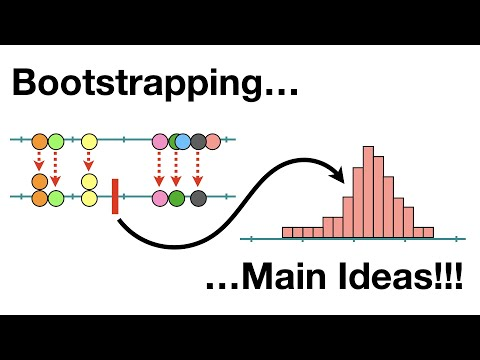

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

#1: The standard diviation is the differences between idivisual data points, or the vaiability of indivisual data in the data set. As for the standard error of the mean, it refers to the differences between sample mean in the data set, or, the variability of the sample mean when we are taking mutiple means of the data ramdomly.

#2: In order to find the 95% confident interval we just need to find the sample mean, and plus and minus approximately two times the standard error of the mean and that is the interval of the 95% confident interval.

#3: In order to find a 95% confidence interval using bootstrapping, we first create a bootstrap sample by randomly selecting data points in a date set, repeating it a thousand times, and then finding the mean of this new set of a thousand dates that we created. Finally, with a thousand different means, we simply choose the middle 95% of all the means (from the 25th mean to the 975th mean), which is the 95% confidence interval we want.

In [1]:
#4:
import numpy as np

# Sample data (replace with your own sample)
sample = np.array([12, 15, 14, 10, 18, 20, 17, 16, 14, 13])

# Set the number of bootstrap samples
n_bootstrap_samples = 1000

# Store the bootstrap estimates
bootstrap_means = []

# Perform bootstrap resampling
for _ in range(n_bootstrap_samples):
    # Generate a bootstrap sample (sample with replacement from the original sample)
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Calculate the mean of the bootstrap sample and store it
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the 95% confidence interval for the mean
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Print the results
print(f"95% Bootstrap Confidence Interval for Mean: ({lower_bound:.2f}, {upper_bound:.2f})")

# To produce a 95% bootstrap confidence interval for a different population parameter, like the population median:
# 1. Replace `bootstrap_means.append(np.mean(bootstrap_sample))` with `bootstrap_means.append(np.median(bootstrap_sample))`.
# 2. Rename `bootstrap_means` to `bootstrap_medians` for clarity if needed.
# 3. The rest of the code can remain the same, as we are still calculating percentiles to get the confidence interval.

# Example change:
# bootstrap_medians = []
# for _ in range(n_bootstrap_samples):
#     bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
#     bootstrap_medians.append(np.median(bootstrap_sample))
# lower_bound = np.percentile(bootstrap_medians, 2.5)
# upper_bound = np.percentile(bootstrap_medians, 97.5)
# print(f"95% Bootstrap Confidence Interval for Median: ({lower_bound:.2f}, {upper_bound:.2f})")
# https://chatgpt.com/share/66fecd96-1ee8-8012-9744-c230fbad1904

95% Bootstrap Confidence Interval for Mean: (13.10, 16.80)


#5: We distinguish between the overall parameter and the sample statistic because confidence intervals are designed to estimate the unknown overall parameter from the sample statistic. The sample statistic is a known value calculated from the sample, while the overall parameter is unknown.
https://chatgpt.com/share/66fecd96-1ee8-8012-9744-c230fbad1904

#6:1:The process of the bootstrapping is to find a lots of means with random choice of the data in the original data set. For exapmle: data set == {1,2,3,4,5}, first bootstrape: {1,2,2,4,5}, second: {1,2,3,4,4} third: {1,1,2,3,4}, as well as the number of the data is the same as the original dataset, and use the data that is included in the data set.
2: The main purpose of bootstrapping is to estimate the distribution of the data set by replacing the data and estimating its mean, thus discovering the possible distribution of the data.
3: Find the sample mean of the sample, and use the bootstrapping technique, by replacing the data in your sample to generate a large number of bootstrapping samples, and then find all the means of the samples we hve generated and find the confident interval with it, (from 25th to 975th data point). After all that, compare your hypothesized mean with that interval, and see if it is in the interval.

#8: Introduction: AliTech has developed a new vaccine designed to improve the health of individuals. The effectiveness of this vaccine can be assessed by comparing the health scores of patients before and after vaccination. The primary question is whether there is a statistically significant improvement in health scores after vaccination.
    
    Quantitative analysis: To quantitatively assess the effect of the vaccine, we will calculate the mean of the initial health score and the final health score, and then estimate confidence intervals for the difference in mean health scores by bootstrapping.
    
    Findings and Discussion:
The mean difference in calculated health scores was approximately 3.7, indicating an improvement after vaccination.
A 95% confidence interval will help assess whether this improvement is statistically significant. If the confidence interval does not include zero, we can reject the hypothesis of no effect.
    Methodology Code and Explanations:
1. Data Preparation
2. Descriptive Statistics
3. Bootstrapping for Confidence Interval
4. Visualizing the Bootstrap Distribution
    
    Further Considerations:
Sample size: This analysis is based on a small sample size (n=10). The larger the sample size, the more reliable the results will be.
Other Variables: Future research could consider the impact of other variables such as age and gender on vaccine effectiveness.
Longitudinal Studies: Conducting longitudinal studies to track health scores over time can provide more insight into the long-term effectiveness of vaccines.


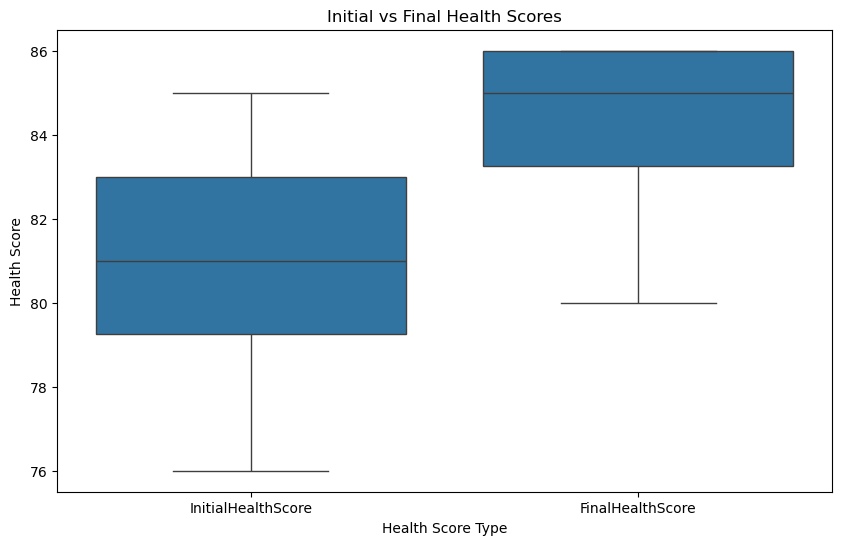

Mean Initial Health Score: 81.00
Mean Final Health Score: 84.30
Mean Difference: 3.30
95% Confidence Interval for Mean Difference: (0.90, 5.30)


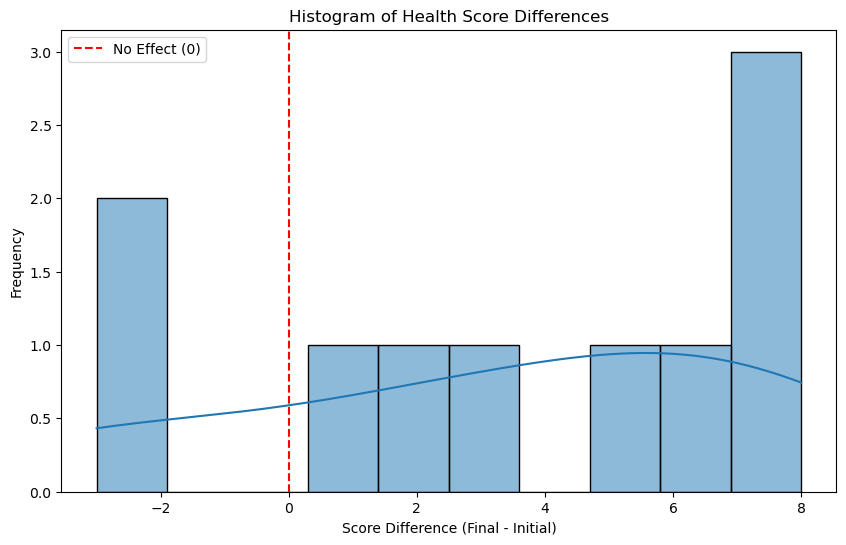

In [1]:
#Data visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars=['PatientID'], value_vars=['InitialHealthScore', 'FinalHealthScore'],
                    var_name='HealthScoreType', value_name='Score')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HealthScoreType', y='Score', data=df_melted)
plt.title('Initial vs Final Health Scores')
plt.xlabel('Health Score Type')
plt.ylabel('Health Score')
plt.show("png")
import numpy as np

# Calculate means
mean_initial = df['InitialHealthScore'].mean()
mean_final = df['FinalHealthScore'].mean()
mean_difference = mean_final - mean_initial

# Bootstrapping to estimate the confidence interval for the mean difference
n_bootstrap_samples = 1000
bootstrap_differences = []

for _ in range(n_bootstrap_samples):
    # Sample with replacement from the differences
    bootstrap_sample = np.random.choice(df['FinalHealthScore'] - df['InitialHealthScore'], size=len(df), replace=True)
    bootstrap_differences.append(np.mean(bootstrap_sample))

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_differences, 2.5)
upper_bound = np.percentile(bootstrap_differences, 97.5)

# Results
print(f"Mean Initial Health Score: {mean_initial:.2f}")
print(f"Mean Final Health Score: {mean_final:.2f}")
print(f"Mean Difference: {mean_difference:.2f}")
print(f"95% Confidence Interval for Mean Difference: ({lower_bound:.2f}, {upper_bound:.2f})")
# Create a histogram of the differences
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

plt.figure(figsize=(10, 6))
sns.histplot(df['ScoreDifference'], bins=10, kde=True)
plt.title('Histogram of Health Score Differences')
plt.xlabel('Score Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='No Effect (0)')
plt.legend()
plt.show("png")


#9: yes